In [ ]:
!pip install quandl
!pip install pandas


In [6]:
import quandl
import pandas as pd

df_ticker = pd.read_csv('ticker_list.csv')
ticker_list = df_ticker['Ticker'].values.tolist()

dic_list = []
for i in ticker_list:
    x = {'dataset' : 'EOD/' + i}
    dic_list.append(x)

In [246]:
quandl.ApiConfig.api_key = 'tzxd26V8wHT__x5R7Jz-'


lag = 2
no_of_companies = 40

# dic_list = [{'dataset' : 'EOD/AAPL'}]

df_ticker = pd.read_csv('ticker_list.csv')
ticker_list = df_ticker['Ticker'].values.tolist()

dic_list = []
for i in ticker_list:
    x = {'dataset' : 'EOD/' + i}
    dic_list.append(x)

    
    
static_args =  {'returns':'pandas',
                'start_date' : '2015-07-01', 
                'end_date' : '2019-10-19',
                'collapse' : 'daily'}

        
def apply_lag(data,lag):
    col_names = data.columns
    print(col_names)



def load_data(dic_list, static_args):
    
    data = []
#     for i in range(len(dic_list)):
    for i in range(no_of_companies):

        
        try:
            ts_args = {**static_args, **dic_list[i]}
            timeseries_data = quandl.get(**ts_args)
            timeseries_data = timeseries_data.rename(columns={'Value': dic_list[i]['dataset']})
            
            col_names = timeseries_data.columns

            shifted_data = []
            for z in range(0,lag+1,1):
                data_shift = timeseries_data.shift(z)
                new_col = []
                for g in col_names:
                    new_col.append(g + '_' + str(z) + '_lag')
                data_shift.columns = new_col
                shifted_data.append(data_shift)

            timeseries_data = pd.concat(shifted_data, axis=1)
            
            data.append(timeseries_data)
            
        except:
            pass
        
        print(i)
            
    return data


def stitch_data(data):
    data = pd.concat(data, axis=0)
    return data

data = load_data(dic_list, static_args)
dataframe = stitch_data(data)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


In [247]:
dataframe

,Open_0_lag,High_0_lag,Low_0_lag,Close_0_lag,Volume_0_lag,Dividend_0_lag,Split_0_lag,Adj_Open_0_lag,Adj_High_0_lag,Adj_Low_0_lag,...,Low_2_lag,Close_2_lag,Volume_2_lag,Dividend_2_lag,Split_2_lag,Adj_Open_2_lag,Adj_High_2_lag,Adj_Low_2_lag,Adj_Close_2_lag,Adj_Volume_2_lag
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-01,38.89,39.2950,38.7500,39.260,4486572.0,0.0,1.0,37.327272,37.715997,37.192897,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-02,39.36,39.6400,39.1500,39.580,2160799.0,0.0,1.0,37.778386,38.047134,37.576824,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-06,39.11,39.6600,39.0800,39.360,2509428.0,0.0,1.0,37.538431,38.066331,37.509637,...,38.7500,39.260,4486572.0,0.0,1.0,37.327272,37.715997,37.192897,37.682404,4486572.0
2015-07-07,39.53,39.7900,39.1359,39.790,2927761.0,0.0,1.0,37.941554,38.191107,37.563291,...,39.1500,39.580,2160799.0,0.0,1.0,37.778386,38.047134,37.576824,37.989545,2160799.0
2015-07-08,39.48,39.4800,38.7100,38.750,3390976.0,0.0,1.0,37.893564,37.893564,37.154505,...,39.0800,39.360,2509428.0,0.0,1.0,37.538431,38.066331,37.509637,37.778386,2509428.0
2015-07-09,39.27,39.3300,38.9100,38.920,2237945.0,0.0,1.0,37.692002,37.749591,37.346468,...,39.1359,39.790,2927761.0,0.0,1.0,37.941554,38.191107,37.563291,38.191107,2927761.0
2015-07-10,39.29,39.4400,39.1550,39.400,2107093.0,0.0,1.0,37.711198,37.855171,37.581623,...,38.7100,38.750,3390976.0,0.0,1.0,37.893564,37.893564,37.154505,37.192897,3390976.0
2015-07-13,39.72,40.0000,39.5400,39.960,1579730.0,0.0,1.0,38.123920,38.392668,37.951153,...,38.9100,38.920,2237945.0,0.0,1.0,37.692002,37.749591,37.346468,37.356066,2237945.0
2015-07-14,40.05,40.6600,39.8900,40.490,2801301.0,0.0,1.0,38.440659,39.026147,38.287088,...,39.1550,39.400,2107093.0,0.0,1.0,37.711198,37.855171,37.581623,37.816778,2107093.0


In [248]:
import xgboost
import numpy as np
from sklearn.metrics import explained_variance_score, mean_squared_error

from sklearn.cross_validation import train_test_split


name_of_y = 'Close_0_lag'


df = dataframe.dropna()
train_dataset, test_dataset  = train_test_split(df, test_size=0.2, random_state=42)

    
train_labels = train_dataset.pop(name_of_y)
test_labels = test_dataset.pop(name_of_y)

xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.8, colsample_bytree=1, max_depth=5)
xgb.fit(train_dataset,train_labels)


predictions = xgb.predict(test_dataset)
print(explained_variance_score(predictions,test_labels))
print(mean_squared_error(predictions,test_labels))


#     print(xgb.feature_importances_)
#     plot_importance(xgb)
#     pyplot.show()
    

[19:58:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.9998900765945253
0.26423192426749575


In [249]:
print(np.std(df['Close_0_lag']))
print(np.mean(df['Close_0_lag']))

48.80691885417509
43.76074853468493


Date
2015-09-23    34.95
2017-04-19    53.07
2017-11-01    68.02
2018-04-20    67.55
2015-09-16    36.52
2019-03-19    81.20
2017-11-27    69.31
2018-12-11    71.05
2015-10-13    35.63
2018-10-05    70.30
2017-12-13    66.68
2018-04-11    66.08
2015-11-25    41.34
2019-10-11    75.30
2019-02-20    78.56
2018-06-26    61.98
2019-03-28    79.70
2016-08-03    47.09
2017-05-04    56.70
2016-07-15    46.67
2016-06-03    45.72
2017-05-08    56.32
2018-09-04    67.27
2016-05-16    42.94
2017-02-10    50.36
2015-11-04    38.34
2018-05-30    62.69
2018-10-26    62.73
2017-04-05    52.71
2015-12-14    40.25
              ...  
2016-10-27    43.38
2018-05-16    61.94
2017-06-29    58.80
2017-08-31    64.72
2018-02-01    72.83
2018-05-10    68.86
2016-03-29    40.16
2016-10-11    45.69
2016-11-22    44.46
2016-12-08    45.80
2017-10-06    66.36
2019-04-04    80.83
2019-05-16    69.30
2018-06-07    65.23
2018-04-05    65.68
2016-08-09    47.45
2018-10-03    72.12
2018-06-13    66.26
2015-07-08    3

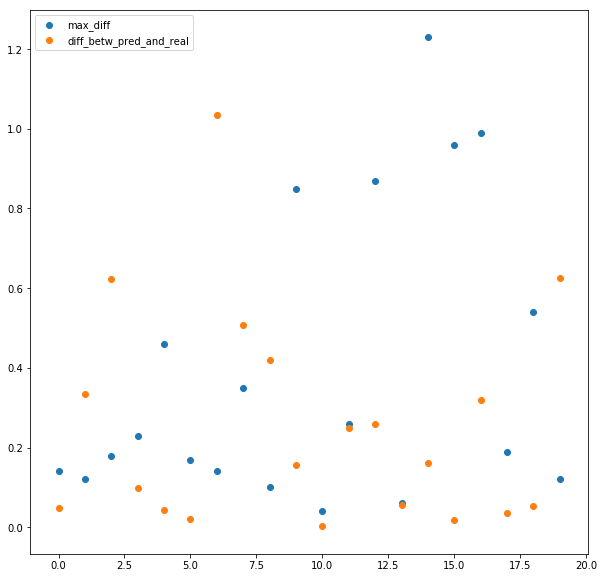

In [250]:
import matplotlib.pyplot as plt

predictions_graph = list(predictions)
test_labels_graph = list(test_labels)

number = np.arange(0,len(test_labels_graph),1)



# plt.scatter(number, predictions_graph)
# plt.scatter(number, test_labels_graph)

# max_difference = []

# for i in range(len(number)):
#     max_difference.append(test_labels_graph[i] - test_dataset['Low_0_lag'][i])

# predictions_graph = predictions_graph[0:30:1]
# test_labels_graph = test_labels_graph[0:30:1]
# number = number[0:30:1]
    
# plt.scatter(number, predictions_graph)
# plt.scatter(number, test_labels_graph)
    
    
    
difference = []
for i in range(len(number)):
    difference.append(predictions_graph[i] - test_labels_graph[i])

plt.figure(figsize=(10,10))

number = number[0:20:1]
max_difference = max_difference[0:20:1]
difference = difference[0:20:1]
    
plt.scatter(number, max_difference, label = 'max_diff')
plt.scatter(number, np.abs(difference), label = 'diff_betw_pred_and_real')
plt.legend()

217

In [ ]:
df_pred = df.pop(name_of_y)
predictions = xgb.predict(df_pred)




In [ ]:
number = np.arange(0,len(df_pred),1)

In [ ]:
CHRIS/ICE_B28